# Best Neighborhood in Pittsburgh
## Team UHA, Group 13 ##
**By Aneesha, Adrian, and Hallie**

### Introduction ###
By brainstorming amongst our group and using the WPRDC datasets, we decided on these three metrics to determine our interpretation of the "best" neighborhood in Pittsburgh:
* Walkability
* Municipal Parks (Recreational Space)
* Crime Rates

You can find the datasets for our respective metrics here (and also on our ReadME)!:

* [Walkability(Adrian Puentes)](https://data.wprdc.org/dataset/sidewalk-to-street-walkability-ratio)
* [Municipal Parks (Hallie Cadet)](https://data.wprdc.org/dataset/allegheny-county-municipal-parks)
* [Crime Rates (Aneesha Kandala)](https://data.wprdc.org/dataset/uniform-crime-reporting-data)

### Why did we choose these metrics? ###
We chose these metrics because we firmly believe that accessibiliy and general livability are some of the most important characterstics when it comes to choosing a "best" neighborhood. We believe that the best places are those that have easy transit where people are able to get around with ease and without a heavy monetary burden, and we also believe that the ability to be around green space and nature is also essential to living a happy, healthy life. Additionally, we wanted to have a metric concerning general safety as that ties in heavily to livability, so analyzing crime rates was another important trait that we wanted to include. The more generaly livability within an area, the better the community connections; the more community within an area, the better it is!

### Data Summary (full versions in our respective notebooks!)

#### Walkability ####
(insert summary of data/process here)


#### Parks ####
(insert summary of data/process here)

#### Crime Rates ####
To analyze my data, I first went in and took a look at my dataset as a whole. After doing so, I picked out the specific information relating to metric, which was neighborhoods and their corresponding crime rates. The column pertaining to the Neighborhoods is labeled "INCIDENTNEIGHBORDHOOD":

In [8]:
import pandas as pd
%matplotlib inline

data = pd.read_csv("crimerates.csv")
data.head()

crime_rate = data["INCIDENTNEIGHBORHOOD"].value_counts()
crime_rate

INCIDENTNEIGHBORHOOD
Central Business District    19943
South Side Flats             19098
Carrick                      11927
Shadyside                     8773
Bloomfield                    8704
                             ...  
Ridgemont                      296
Outside County                 256
Troy Hill-Herrs Island         252
Mt. Oliver Neighborhood        117
Mt. Oliver Boro                101
Name: count, Length: 98, dtype: int64

I wanted to look at this data further by selecting the top 10 LOWEST neighborhoods, since with this metric, we could classify the "better" characterstic on the neighborhoods with the lowest ratings:

In [9]:
crime_rates_sorted = crime_rate.sort_values()
lowest_10_rates = crime_rates_sorted.head(10)
lowest_10_rates

INCIDENTNEIGHBORHOOD
Mt. Oliver Boro            101
Mt. Oliver Neighborhood    117
Troy Hill-Herrs Island     252
Outside County             256
Ridgemont                  296
Chartiers City             339
New Homestead              353
East Carnegie              401
Outside State              401
Swisshelm Park             443
Name: count, dtype: int64

However, after doing so, I ran into a problem with jurisdictions, so I had to clean up the data by excluding "Neighborhoods" like Mt. Oliver Borough (which is a municipality outside of Pittsburgh) as well as Outside County and Outside State, which just relate to reports filed outside of Pittsburgh or Pennsylvania respectively:

In [3]:
exclude = ["Mt. Oliver Boro", "Outside County", "Outside State", "UNKNOWN"]
clean = crime_rates_sorted[~crime_rates_sorted.index.isin(exclude)]

lowest10 = clean.sort_values().head(10)
lowest10

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood    117
Troy Hill-Herrs Island     252
Ridgemont                  296
Chartiers City             339
New Homestead              353
East Carnegie              401
Swisshelm Park             443
Summer Hill                523
Mount Oliver               541
Regent Square              565
Name: count, dtype: int64

Then, however, I had another issue where I had duplicates of the same neighborhood, specifically Mt. Oliver Neighborhood and Mount Oliver. So, I had to merge these together:

In [4]:
clean.loc["Mount Oliver"] = (clean.get("Mt. Oliver Neighborhood", 0) + clean.get("Mount Oliver", 0))
clean = clean.drop(["Mt. Oliver Neighborhood", "Mount Oliver"], errors="ignore")

clean = clean.sort_values()
lowestsorted10 = clean.sort_values().head(10)
lowestsorted10

INCIDENTNEIGHBORHOOD
Troy Hill-Herrs Island    252
Ridgemont                 296
Chartiers City            339
New Homestead             353
East Carnegie             401
Swisshelm Park            443
Summer Hill               523
Regent Square             565
Hays                      569
Arlington Heights         573
Name: count, dtype: int64

Now that I had a clear 10 neighborhoods with the lowest crime rates, I wanted to visualize my findings through a graph! Let's look at that now:

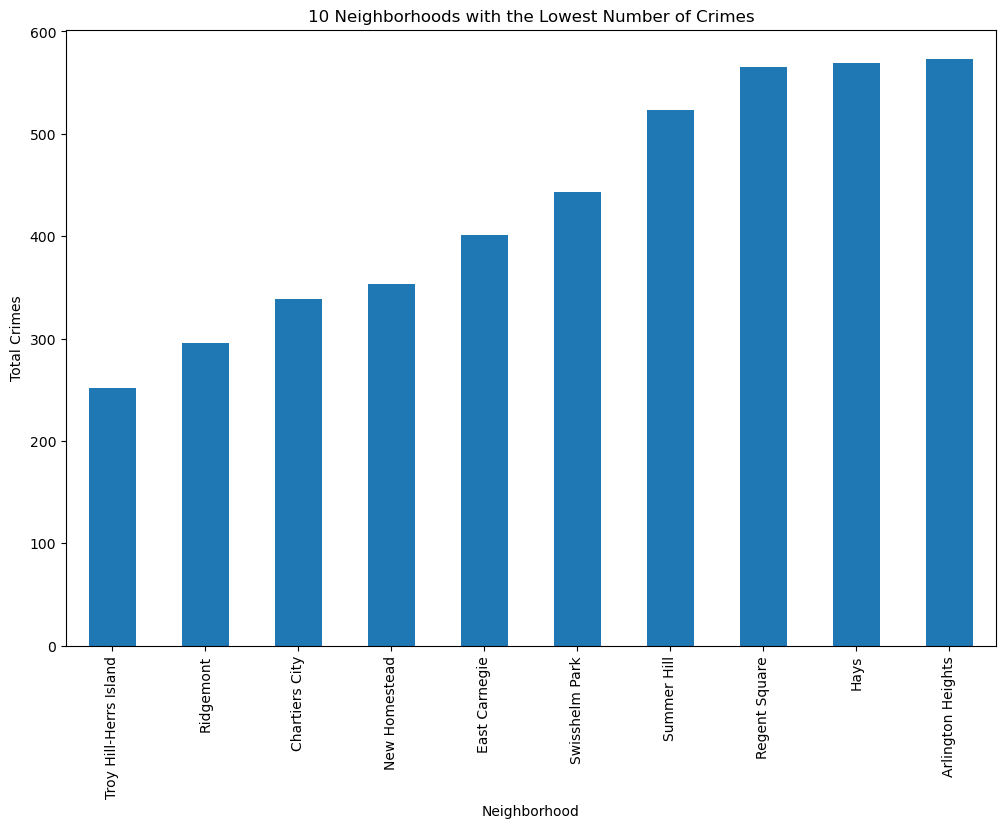

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
lowestsorted10.plot(kind="bar")

plt.title("10 Neighborhoods with the Lowest Number of Crimes")
plt.xlabel("Neighborhood")
plt.ylabel("Total Crimes")
plt.show()

And voila! Those were my findings for the top 10 lowest crime rates in Pittsburgh neighborhoods. 

### Top Data and Conclusions from Each Group Member ###

#### Walkability ####
For my part of the project, I defined “best” as **most walkable**, based on the sidewalk-to-street length ratio.

Using this metric, I found that some tracts have much higher ratios than others, which suggests they provide better sidewalk coverage and may be more comfortable for pedestrians. This is one small piece of what makes a neighborhood “best,” but it shows how we can use data to measure something that people usually describe in a vague way (like “this place is nice to walk around”).

The top 5 tracts by sidewalk/street ratio are:

- Tract 3050900 - Shadyside
- Tract 3982200 - Downtown (Central Buisness District)
- Tract 3981200 - Southside Flats (E Carson St area)
- Tract 3980000 - Southside Flats (West Side, Station Square/hillside base.)
- Tract 3051100 - Shadyside (North, borders Bloomfeild line and Baum / Centre corridor.)

Compared to my personal experience, my favorite neighborhoods are often places where it feels easy and safe to walk, which fits this metric pretty well. However, I also know that other factors matter too, like hills, access to stores and buses, safety, and community spaces. That is why our group will combine my sidewalk walkability metric with my teammates’ metrics to pick a final “best neighborhood in Pittsburgh.”

#### Parks ####
Parks are like the hidden gems of Pittsburgh and show which neighborhoods have a spark of life and community engagement. They offer recreational activities and venues for gatherings that can contribute to the people's well-being. By examining how many municipal parks are in a neighborhood, you can see which neighborhood prioritizes fun and relaxation for its residents. Which means more parks, makes happier residents, which makes a neighborhood better. It would be obvious that the whole city of Pittsburgh has the most municipal parks, but since we're researching which one is the best within the Pittsburgh area, I decided to take it out. From there, I had it count up the number of times they appeared in the dataset and had them ranked from highest to lowest, and took the top ten. 

The top 5 munipalities I found were :
- Ross Township
- Monroeville
- Upper Saint Clair
- West Mifflin
- Penn Hills

From the dataset, Ross Township was the best neighborhood, and Baldwin Township was the loser of this set. I’ve never heard of any of these places, so I’m not too sure of how true this is. 

#### Crime Rates ####
Based on our data, we can safely say that Troy Hill (as well as Herr's Island, which is part of Troy Hill) is the Neighborhood with the lowest crime rate. With this metric in place, we can say that Troy Hill is the "safest" neighborhood in Pittsburgh, and therefore the "best" under this metric!

The top 5 neighborhoods with the lowest crime rates, for your reference, are:
- Troy Hill (including Herr's Island)
- Ridgemont
- Chartiers City
- New Homestead
- East Carnegie

All in all, analyzing crime rates is a very meaninful indicator to consider in a place's overall livibility. By analyzing the data from WPRDC, we were able to identify which neighborhoods consistently experience lower rates of criminal incidents, suggesting that such areas have better community provisions, local resoruces, and overall safety initiatives. Using pandas and matplotlib to visualize this large dataset helped us to understand the clear differences across the board between different Pittsburgh neighborhoods. Although crime statistics alone do not directly determine the desirability of an area, it does provide insight onto the neighborhood itself and the day-to-day livability within the area. Pittsburgh posseses the unique quality of having a wide range of age and cultural demographics within its population, so it is important to have safe environments that are well suited for growing families, college students, young adults, and the elderly alike. 

### Conclusion ###
All in all, it appears as though each of our metrics produced differing results from each other. Though our metrics tied into a similar overarching metric, perhaps our individual metrics did not relate enough to each other to reach similar results. At the end of the day, every neighborhood is different from each other and has varying pros and cons. Especially in an area like Pittsburgh, where the geography is so varied due to the amount of elevation differences and geographical separation with all of the bridges, it is hard to produce a neighborhood that has *everything*. However, finding out what metrics matter to what people and analyzing such metrics help to find the best suited neighborhood for an individuals particular needs. 